In [2]:
# Import Packages :

import pandas as pd
from main import data


ModuleNotFoundError: No module named 'pandas'

In [ ]:
'''
data_nodes = pd.read_csv('input/nodes.csv')
data_links = pd.read_csv('input/links.csv')

print( type(data_nodes), '\n', data_links.shape )

nodes = dict(data_nodes)
links = dict(data_links)

Start = data.DataHandle( data_links= links, data_nodes= nodes)

Start.initial_data()

layer_one_links, layer_two_links, interconnected_links = Start.modify_links()

print(len(layer_one_links), '\n', len(layer_two_links), '\n', len(interconnected_links))

print( layer_one_links[470], '\n', layer_two_links[1000], '\n', interconnected_links[10000] )
'''

In [ ]:
# the ruunig time of previous cell was : 4m and 16s
#Here is the outputs!
'''
<class 'pandas.core.frame.DataFrame'> 
(969395, 4)
Getting things Ready . . . 
93924 
773939 
101532
(28, 1939) 
(5699, 6378) 
(590, 7377)
'''

In [ ]:
# You can use this to save the outputs from  modify_links  method !
# There is one sample of this output , in Archive Folder .

'''
layer_one_links_save = pd.DataFrame(layer_one_links)
layer_one_links_save.set_axis(['source', 'target'], axis=1)
layer_one_links_save.to_csv('output/Layer One Links - GeneratedFROMindex.py.csv', index = False )

layer_two_links_save = pd.DataFrame(layer_two_links)
layer_two_links_save.set_axis(['source', 'target'], axis=1)
layer_two_links_save.to_csv('output/Layer Two Links - GeneratedFROMindex.py.csv', index = False )

interconnected_links_save = pd.DataFrame(interconnected_links)
interconnected_links_save.set_axis(['source', 'target'], axis=1)
interconnected_links_save.to_csv('output/InterConnected Links - GeneratedFROMindex.py.csv', index = False )
'''

In [2]:
# This Will Load the data from previues saving outputs from  modify_links  method !

"""
layer_one_links_from_save = pd.read_csv('output/Layer One Links - GeneratedFROMindex.py.csv')
layer_two_links_from_save = pd.read_csv('output/Layer Two Links - GeneratedFROMindex.py.csv')
interconnected_links_from_save = pd.read_csv('output/InterConnected Links - GeneratedFROMindex.py.csv')
layer_one_links = list(layer_one_links_from_save.values.tolist())
layer_two_links = list(layer_two_links_from_save.values.tolist())
interconnected_links = list(interconnected_links_from_save.values.tolist())

# This will return the exact result as the earlier outputs from  modify_links  method

print(len(layer_one_links), '\n', len(layer_two_links), '\n', len(interconnected_links),
      layer_one_links[470], '\n', layer_two_links[1000], '\n', interconnected_links[10000])
"""

93924 
 773939 
 101532 [28, 1939] 
 [5699, 6378] 
 [590, 7377]


In [2]:
# That was too much!(969395)! We selected some of the nodes and links base on their likes in R before !!
# Loading that data to avoid long proccess and time !

new_data = pd.read_csv( 'input/link_dataFinal.csv' , index_col=0)
new_data.shape

(199981, 4)

In [3]:
# Finding the nodes from new_data to pass to the DataHandel class!

new_data.columns

Index(['X_igraph_index', 'source', 'target', 'key'], dtype='object')

In [4]:
# Getting data ready by turn it into dict !

new_nodes = []

for node in new_data.loc[:,'source'].unique() :
    if node not in new_nodes :
        new_nodes.append(node)

for node in new_data.loc[:,'target'].unique() :
    if node not in new_nodes :
        new_nodes.append(node)

In [5]:
# Continue getting data ready this time by turnnig to dicts both !

new_links = dict(new_data)
new_nodes = pd.DataFrame(new_nodes)
new_nodes = new_nodes.set_axis(['id'], axis=1)
new_nodes = dict(new_nodes)
print(type(new_nodes), type(new_links))

<class 'dict'> <class 'dict'>


In [6]:
# This will prepare and preprocess the data :

Start = data.DataHandle( data_links= new_links, data_nodes= new_nodes)

In [7]:
# This method finding the source and target palce and values in our data and Also
# find and initial the values for each layer !

#Start.initial_data()

ValueError:  Please pass the adertiser_nodes to this Function Manually !

In [ ]:
# The error seggest to us provide adv and pub nodes manually. This is beacuse our new_data
# had no obvious intialize laybel for whether a node is represent the advertisers or publishers

# So we need to pass these argumans to initial method from DataHandel class :
#            adertiser_nodes= ??? , publisher_nodes = ???

In [7]:
advertiser_campaigns = pd.read_csv( 'input/advertiser_campaigns.csv' , index_col=0)
publisher_contents = pd.read_csv( 'input/publisher_contents.csv' , index_col=0)
print(advertiser_campaigns.columns[13], '\n',publisher_contents.columns[25])

Advertiser ID 
 Media App Media - Media → Publisher ID


In [8]:
advertisers_nodes = list( advertiser_campaigns['Advertiser ID'].unique() )#It must be list
publishers_nodes = list( publisher_contents['Media App Media - Media → Publisher ID'].unique() )#It must be list

In [9]:
# Try again using our two new lists:

Start.initial_data( adertiser_nodes = advertisers_nodes , publisher_nodes = publishers_nodes )

# WorKed :)

In [10]:
new_layer_one_links, new_layer_two_links, new_interconnected_links = Start.modify_links()

 Getting things Ready . . . 


In [11]:
print( len(new_layer_one_links), len(new_layer_two_links), len(new_interconnected_links))

765 1531 2240


In [12]:
from main import graph

In [14]:
G = graph.Graph(layer_one_name= 'Advertisers', layer_two_name= 'Publishers')

In [ ]:
'''
g = G.add_links( layer_one_links = layer_one_links ,
            layer_two_links = layer_two_links ,
            Interconnected_links = interconnected_links )
'''

In [15]:
g_pymnet = G.add_links( layer_one_links = new_layer_one_links ,
            layer_two_links = new_layer_two_links ,
            Interconnected_links = new_interconnected_links )

 Starting to Create Graph . . . 
 The default values for aspects, fullyInterconnected and nx_use arguments are 1 and False. 
Successfully Create The Graph Object !
 Adding layers . . . 
 Done !
{'Publishers', 'Advertisers'}


In [15]:
g_nx_layer1, g_nx_layer2 , g_nx = G.add_links( layer_one_links = new_layer_one_links ,
                                               layer_two_links = new_layer_two_links ,
                                               Interconnected_links = new_interconnected_links ,
                                               nx_use = True)

In [17]:
print(g_pymnet , '\n', g_nx)


 Graph with 520 nodes and 4135 edges


In [7]:
# This may take a few while :

Matrix_from_g , Lists_from_g = g_pymnet.get_supra_adjacency_matrix()

In [ ]:

import pickle

with open('output/matrix of G.pkl', 'wb') as file:
    pickle.dump(Matrix_from_g, file)

with open('output/list of G.pkl', 'wb') as file:
    pickle.dump(Lists_from_g, file)


In [8]:
# This is the same as previous cell But for All Data set 
# This can Be find in Archive !

'''
Matrix_from_gBigData , Lists_from_gBigData = g.get_supra_adjacency_matrix()

import pickle

with open('output/matrix of G BigData.pkl', 'wb') as file:
    pickle.dump(Matrix_from_gBigData, file)

with open('output/list of G BigData.pkl', 'wb') as file:
    pickle.dump(Lists_from_gBigData, file)
'''

 starting to show !
 this may take a few while 
 the defult value for return_Graph_object is False 


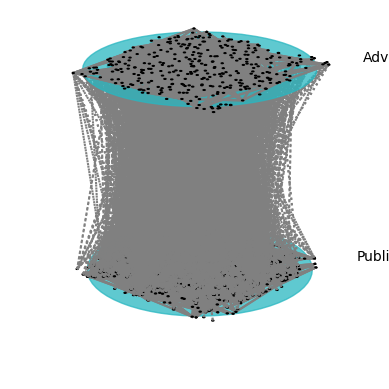

In [24]:
G.show(g_pymnet)

In [47]:
# Centrality Measures :

import networkx as nx

def calculate_centrality_measures(G):
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    return degree_centrality, betweenness_centrality, closeness_centrality

In [50]:

from itertools import combinations

# Graph
G = g_nx

degree_centrality, betweenness_centrality, closeness_centrality = calculate_centrality_measures(G)

features = []
labels = []

# Calculating features for each pair of nodes:
for node1, node2 in combinations(G.nodes(), 2):
    
    # Centrality measures for node1 and node2
    degree_centrality_1 = degree_centrality[node1]
    degree_centrality_2 = degree_centrality[node2]
    betweenness_centrality_1 = betweenness_centrality[node1]
    betweenness_centrality_2 = betweenness_centrality[node2]
    closeness_centrality_1 = closeness_centrality[node1]
    closeness_centrality_2 = closeness_centrality[node2]
    
    # Directly compute and append features    
    features.append((
        node1,
        node2,
        len(list(nx.common_neighbors(G, node1, node2))),  # Common Neighbors
        next(nx.preferential_attachment(G, [(node1, node2)]))[2],  # Preferential Attachment
        next(nx.resource_allocation_index(G, [(node1, node2)]))[2],  # Resource Allocation
        next(nx.adamic_adar_index(G, [(node1, node2)]))[2],  # Adamic Adar
        next(nx.jaccard_coefficient(G, [(node1, node2)]))[2] , # Jaccard Coefficient
        (degree_centrality_1 + degree_centrality_2) / 2,
        (betweenness_centrality_1 + betweenness_centrality_2) / 2,
        (closeness_centrality_1 + closeness_centrality_2) / 2
    ))

    # Existence of links between nodes (1 or 0)
    labels.append(1 if G.has_edge(node1, node2) else 0)

# Creating a DataFrame from the features and labels
features_df = pd.DataFrame(features,
                           columns=['node1','node2','Common Neighbors', 
                                    'Preferential Attachment', 'Resource Allocation', 
                                    'Adamic Adar', 'Jaccard Coefficient', 'Average Degree Centrality',
                                    'Average Betweenness Centrality', 'Average Closeness Centrality'])

features_df['Label'] = labels

# Now features_df is ready to use in a machine learning model


In [51]:
features_df.to_csv('output/features_df.csv')

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming features_df is your DataFrame from the previous step
X = features_df.drop(['node1','node2','Label'], axis=1)  # Features
y = features_df['Label']  # Labels

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

# Example of making a prediction for a new pair of nodes
# Let's say we want to predict the likelihood of a link between two new nodes
# with the following features: [5 (common neighbors), 10 (preferential attachment),
# 0.15 (resource allocation), 0.5 (adamic adar), 0.2 (jaccard coefficient)]
#new_pair_features = [[5, 10, 0.15, 0.5, 0.2]]
#new_pair_prediction = rf_classifier.predict(new_pair_features)
#print(f'Prediction for the new pair: {new_pair_prediction[0]}')
# A prediction of 1 indicates a likely link, while 0 indicates unlikely.

# Confusion Matrix Guide :
#    [ [TN    FP]
#      [FN    TP] ]


Accuracy: 0.9975915221579962
Confusion Matrix:
[[26181    11]
 [   54   742]]


* This was Before adding calculate_centrality_measures ::

    True Negatives (TN): 26178 pairs were correctly predicted as not having a link.
    
    False Positives (FP): 14 pairs were incorrectly predicted as having a link (but actually do not).

    False Negatives (FN): 69 pairs were incorrectly predicted as not having a link (but they actually do).
    
    True Positives (TP): 727 pairs were correctly predicted as having a link.


# After:
    [[26181    11]
    [   54   742]]

In [58]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score


# Prepare data
X = np.array(features_df.drop(['node1','node2','Label'], axis=1))
y = np.array(features_df['Label'])

# Stratified K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)
scores = []
confuse_matrix = []

# To store predictions and actual labels
all_predictions = []
all_actuals = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train model
    clf = RandomForestClassifier(n_estimators=100, random_state=42, verbose = 1)
    clf.fit(X_train, y_train)
    
    # Predict probabilities
    probabilities = clf.predict_proba(X_test)[:, 1]
    
    # Adjust threshold here if needed :
    threshold = 0.5
    predictions = (probabilities >= threshold).astype(int)
    
    # Calculate metrics
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, predictions, average='binary')
    accuracy = accuracy_score(y_test, predictions)
    confuse_matrix.append(confusion_matrix(y_test, predictions))
    all_predictions.extend(predictions)
    all_actuals.extend(y_test)
    scores.append((accuracy, precision, recall, fscore))


# Creating DataFrame
results_df = pd.DataFrame({
    'Actual': all_actuals,
    'Predicted': all_predictions
})

# Saving DataFrame to CSV
csv_path = 'output/predictions_and_actuals.csv'
results_df.to_csv(csv_path, index=False)

print(f"Saved predictions and actual labels to {csv_path}")

# Calculate average scores
avg_scores = np.mean(scores, axis=0)
print(f"Average Accuracy: {avg_scores[0]}")
print(f"Average Precision: {avg_scores[1]}")
print(f"Average Recall: {avg_scores[2]}")
print(f"Average F1-Score: {avg_scores[3]}")


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

Saved predictions and actual labels to output/predictions_and_actuals.csv
Average Accuracy: 0.9975989328590483
Average Precision: 0.9826004529833723
Average Recall: 0.9383315202769881
Average F1-Score: 0.959897077025181


In [ ]:
# Confusion Matrix Guide :
#    [ [TN    FP]
#      [FN    TP] ]

In [114]:
# Here we look at the Confusion Matrix :

tn_fn = []
fp_tp = []
for TNFP_FNTP in confuse_matrix:
    
    for TN_and_FN_or_FP_and_TP in TNFP_FNTP :
        TN_and_FN = TN_and_FN_or_FP_and_TP[0]
        FP_and_TP = TN_and_FN_or_FP_and_TP[1]
        tn_fn.append(TN_and_FN)
        fp_tp.append(FP_and_TP)
tn = []
fn = []
fp = []
tp = []
for i in range(0, len(tn_fn), 2) :
    tn.append(tn_fn[i])
for i in range(1, len(tn_fn), 2) :
    fn.append(tn_fn[i])
for i in range(0, len(tn_fn), 2) :
    fp.append(fp_tp[i])
for i in range(1, len(tn_fn), 2) :
    tp.append(fp_tp[i])

print(f" The Max True Negatives (TN): {max(tn)} \n",
      f"The min False Negatives(FN): {min(fn)} \n",
      f"The min False Positives(FP): {min(fp)} \n",
      f"The Max True Positives (TP): {max(tp)} \n")

 The Max True Negatives (TN): 13077 
 The min False Negatives(FN): 19 
 The min False Positives(FP): 4 
 The Max True Positives (TP): 394 



In [132]:
import matplotlib.pyplot as plt
def visualize_nx(G, title =  None, save_ = False, save_to = "output"):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    centrality = nx.betweenness_centrality(G)
    nx.draw(G, pos, node_size=[v * 10000 for v in centrality.values()], node_color=list(centrality.values()), cmap=plt.cm.viridis, with_labels=False)
    plt.title(title)
    if save_ == True:
        if title is not None :
            plt.savefig(f"{save_to}/Fig {title} from visualize_nx.png")
        else:
            plt.savefig(f"{save_to}/Fig{np.random.randint(10000)} from visualize_nx.png")
    plt.show()

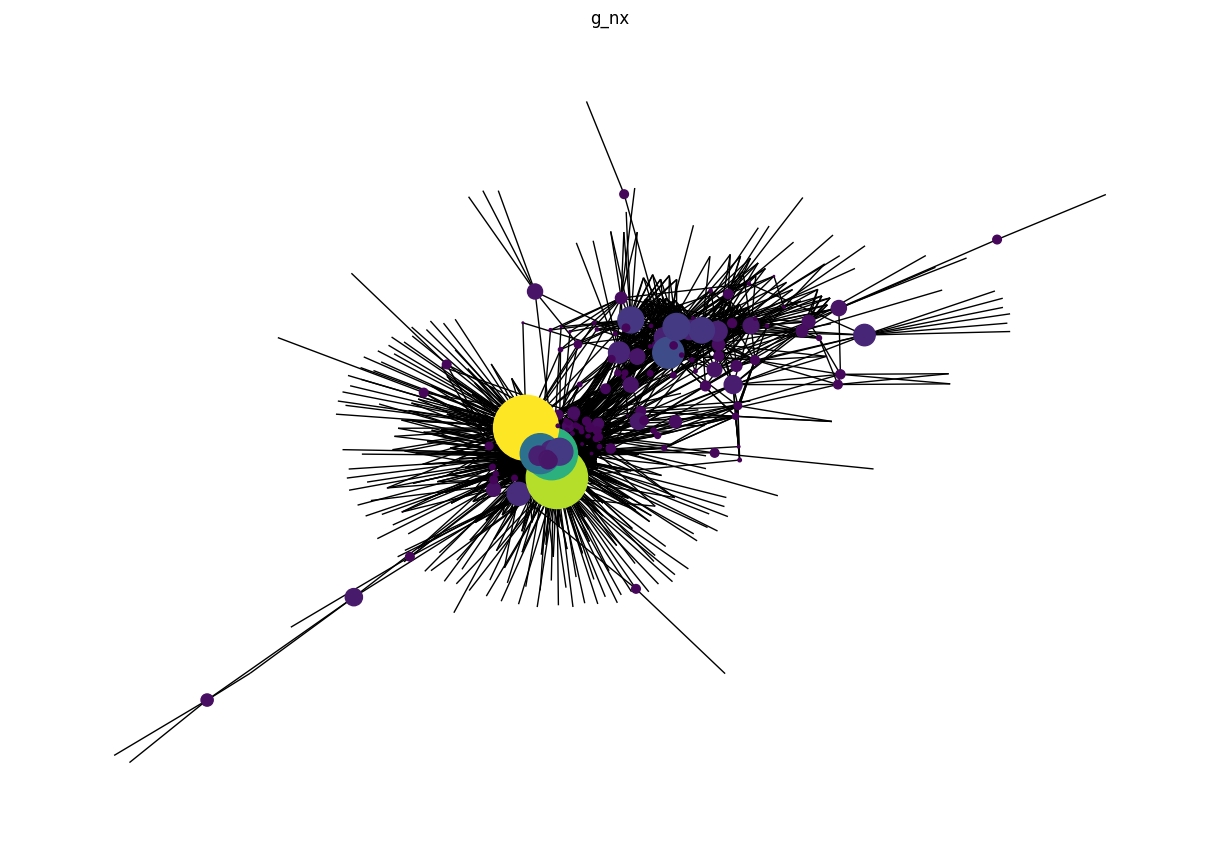

In [133]:
visualize_nx(g_nx, title = 'g_nx', save_ = True)

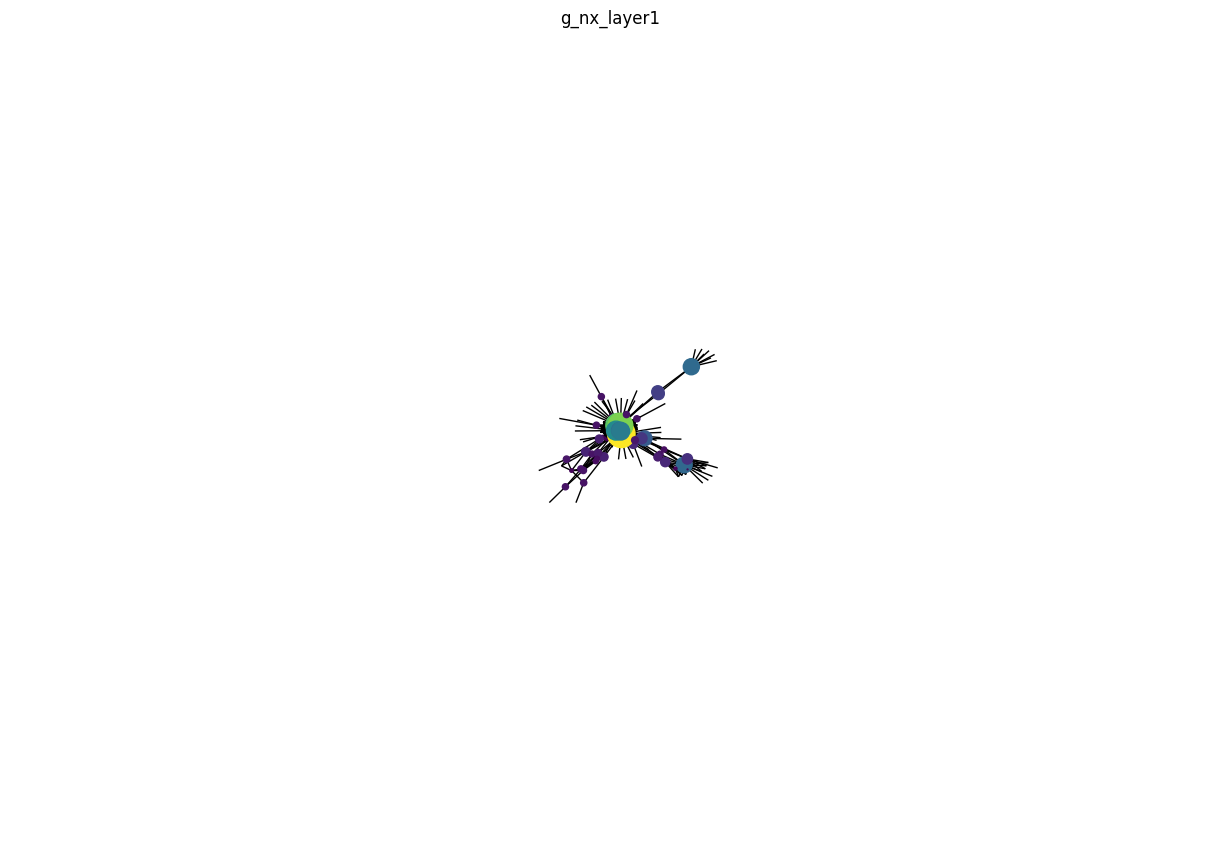

In [134]:
visualize_nx(g_nx_layer1, title = 'g_nx_layer1', save_ = True)

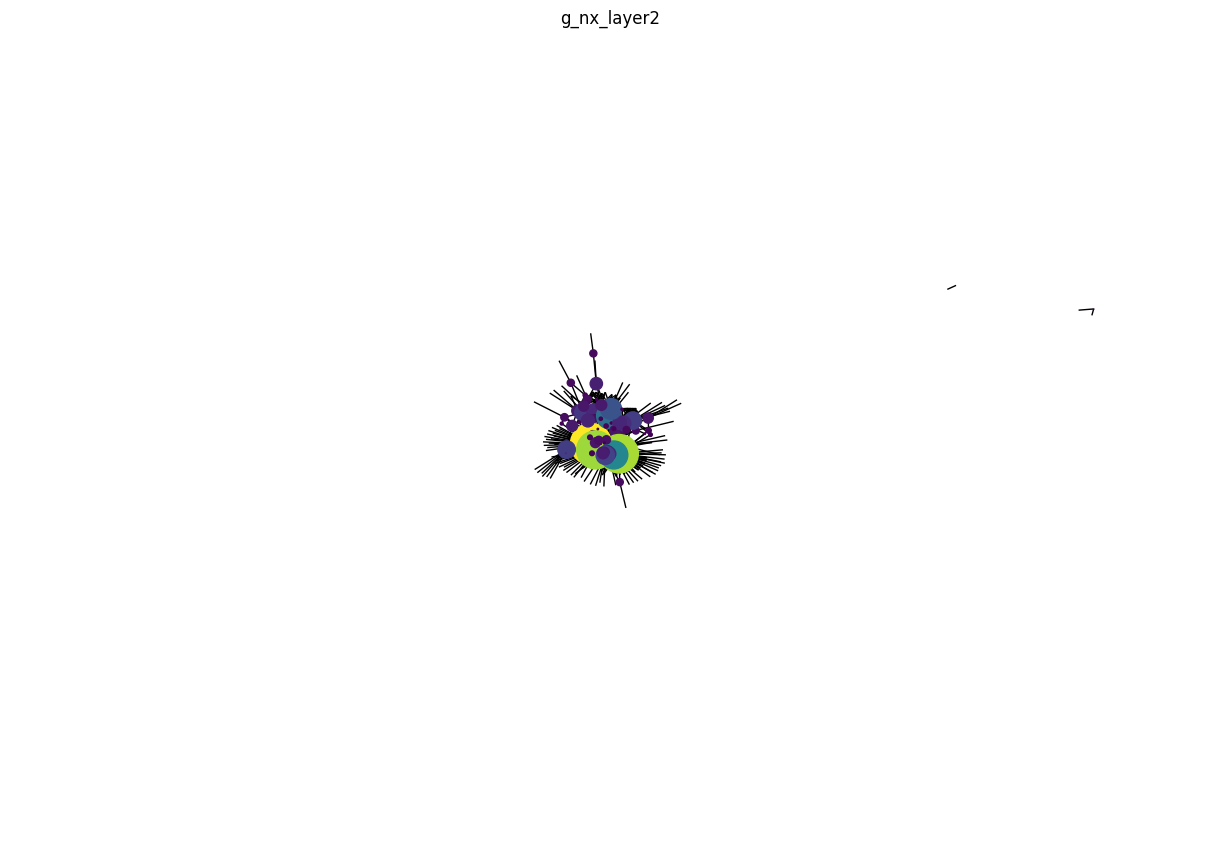

In [135]:
visualize_nx(g_nx_layer2, title = 'g_nx_layer2', save_ = True)